### Problem 1
In this question, we will use the csv file **Temp.csv**. 
- Read it into a data frame, call it `Temp`. (Import the packages you think you need).

In [1]:
#### Your code here
import pandas as pd
Temp = pd.read_csv('/Users/shuozhang/Desktop/kaggle/Temp.csv')
Temp

,City,State,Temperature
0,NYC,New York,67
1,Albany,New York,49
2,Buffalo,New York,38
3,Hartford,Connecticut,63
4,Bridgeport,Connecticut,58
5,Treton,New Jersey,72
6,Newark,New Jersey,68


- We learned that the temperature at New Haven, Connecticut is currently 58 degree fahrenheit. Add this information into the DataFrame.

In [2]:
#### Your code here
new_row = pd.DataFrame([['New Haven', 'Connecticut', 58]], columns=Temp.columns)
Temp = pd.concat([Temp, new_row], axis=0)
Temp

,City,State,Temperature
0,NYC,New York,67
1,Albany,New York,49
2,Buffalo,New York,38
3,Hartford,Connecticut,63
4,Bridgeport,Connecticut,58
5,Treton,New Jersey,72
6,Newark,New Jersey,68
0,New Haven,Connecticut,58


- Replace the names of the states by their abbreviations. That is 
    - Connecticut --> CT
    - New Jersey  --> NJ
    - New York    --> NY

In [3]:
#### Your code here
Temp.replace(["New York","Connecticut","New Jersey"],["NY","CT","NJ"], inplace=True)
Temp

,City,State,Temperature
0,NYC,NY,67
1,Albany,NY,49
2,Buffalo,NY,38
3,Hartford,CT,63
4,Bridgeport,CT,58
5,Treton,NJ,72
6,Newark,NJ,68
0,New Haven,CT,58


- Select the rows in New York.

In [4]:
#### Your code here
Temp.loc[Temp.State=='NY']

,City,State,Temperature
0,NYC,NY,67
1,Albany,NY,49
2,Buffalo,NY,38


- What is the average of the temperature of cities in NY?

In [5]:
#### Your code here
Temp.loc[Temp.State=="NY", "Temperature"].mean()

51.333333333333336

- Find the mean and the standard deviation of the temperature of each state.

In [14]:
#### Your code here
import numpy as np
df1=Temp.groupby('State').agg({'Temperature':np.mean}).rename(columns={"Temperature": "avg_Temperature"}).reset_index()
df1

,State,avg_Temperature
0,CT,59.666667
1,NJ,70.000000
2,NY,51.333333


In [15]:
df2=Temp.groupby('State').agg({ 'Temperature':np.std}).rename(columns={"Temperature": "std_Temperature"}).reset_index()
df2

,State,std_Temperature
0,CT,2.886751
1,NJ,2.828427
2,NY,14.640128


In [16]:
pd.merge(df1,df2,how='inner',on='State')

,State,avg_Temperature,std_Temperature
0,CT,59.666667,2.886751
1,NJ,70.000000,2.828427
2,NY,51.333333,14.640128


- We know the capital of each state: 
    - Connecticut --> Hartford
    - New Jersey  --> Treton
    - New York    --> Albany
    
    Create a data frame, `Capital`, with two columns: State and Capital, which should look like:
    
|| State| Capital|
| :-: |:---: | :---:|
| 0| CT  | Hartford|
| 1| NJ | Treton|
| 2| NY| Albany|

In [17]:
#### Your code here
Capital = pd.DataFrame({'State':['CT', 'NJ', 'NY'],
                        'Capital':['Hartford','Treton','Albany']})
Capital

,State,Capital
0,CT,Hartford
1,NJ,Treton
2,NY,Albany


- Mutate a new boolean column, `Capital`, to `Temp`, which is `True` if the city in the row is the capital of the state, else `False`.

In [18]:
import numpy as np
Temp['Capital']=np.where(Temp['City'].isin(['Albany','Hartford','Treton']), True, False)
Temp

,City,State,Temperature,Capital
0,NYC,NY,67,False
1,Albany,NY,49,True
2,Buffalo,NY,38,False
3,Hartford,CT,63,True
4,Bridgeport,CT,58,False
5,Treton,NJ,72,True
6,Newark,NJ,68,False
0,New Haven,CT,58,False


In [11]:
# question 2: still use temp data to plot how the temperature varies across the city

In [19]:
import matplotlib.pyplot as plt

In [20]:
Temp=Temp.sort_values(by='Temperature', ascending=True)

In [21]:
city=Temp['City']
temp=Temp['Temperature']

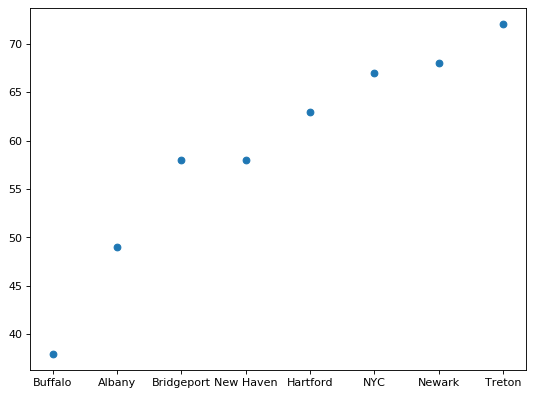

In [22]:
import numpy as np
plt.figure(figsize=(8, 6), dpi=80)
ind=range(0, len(city))
plt.scatter(ind, temp)
plt.xticks(range(len(city)), city)
plt.show()

In [ ]:
# plot scatter between one numeric feature and one categorical feature